<a href="https://colab.research.google.com/github/Fonzzy1/LLM-Workshop/blob/main/workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
execute:
  cache: true
jupyter: python3

---

<a href="https://colab.research.google.com/github/Fonzzy1/LLM-Workshop/blob/main/workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LLMs for Communications Methods**
##### Presented at the ADM+S 2026 Summer School as the interactive component of
# **Integrating LLMs into communication research methods: Possibilities, assumptions and risks**


This session will provide users with a hands-on opportunity to see how language models can be integrated into communications research, and what possibilities and risks this presents.

<br>

*Authors: Alfie Chadwick and Laura Vodden*



---

# **🔨 Part 1. Setting up**



### **1.1 Housekeeping**

**Before you proceed**

The default runtime type of Colab instances is CPU based. We will need to change our runtime type to **T4 GPU** or better.
Change this by either going to **Runtime > Change runtime type**

*or*

by going to the tiny arrow in the top right corner of your browser and selecting **Change runtime type**.

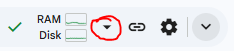

You should now see 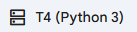 in the bottom right corner of your browser.

Source [here](https://colab.research.google.com/github/5aharsh/collama/blob/main/Ollama_Setup.ipynb#scrollTo=o2ghppmRDFny).



### **1.2 Using Colab Notebooks**

As we work through this notebook, we will run each code cell consecutively. When you mouse over each code block, a image.png button will appear in the top left corner of that cell. **Clicking** this will **run the code** in that cell.

Once the code has finished running, you will see a green tick and the time taken to run the code beside this button:

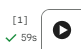

**Hint:** Look for the 🏃 emoji to know which cells to run.

<br>

### **1.3 Set up ollama environment, and install and import libraries**
This should only take a minute or two.

In [1]:
#| eval: false
!sudo apt update
!sudo apt install -y pciutils zstd
!curl -fsSL https://ollama.com/install.sh | sh
!pip install ollama kagglehub kagglehub[pandas-datasets] pandas

# Fancy little subprocess trick to get ollama working in Colab workbooks
import subprocess
proccess = subprocess.Popen(['ollama', 'serve'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, stdin=subprocess.DEVNULL, close_fds=True)

import pandas as pd
pd.set_option('display.max_colwidth', None)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cli.github.com/packages stable InRelease [3,917 B]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.8 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,329 kB]
Get:6 https://cli.github.com/packages stable/main amd64 Packages [356 B]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:13 https://r2u.stat.illinois.edu

### **1.4 Model selection**

We are going to be using **four** Large Language Models today:
* Llama
* Qwen
* Gemma
* Deepseek



All of these models are **open source**, and all but Gemma are the same size.  
However, they will exhibit slight differences when we ask them the same
question.

For other models check https://ollama.com/library

<br>


> 🏃 **Run the cell below** to 'pull' our models from the ollama library. This could take up to 3 minutes.

In [2]:
#| eval: false
!ollama pull llama3.1:8b
!ollama pull qwen3:8b
!ollama pull gemma3:4b
!ollama pull deepseek-r1:8b

print('Done!')





Done!


**While this runs:**

✋ Does anybody need any assitance?

✋ Are there any concepts/jargon we should clarify?

---

# **🤖 Part 2. Interacting with LLMs in Python**

Unlike interacting with a chat client online, using LLMs in Python is much more
flexible but takes a little time to set up.

In Python we can create **functions** - repeatable pieces of code using the `def`
syntax. We can pass **arguments** to these functions, which change how the function behaves.

Below is a function that takes two arguments:

1. a **prompt** (```prompt```); and
    
2. the name of the **model** we want to use (```mymodel```)



<br>

> 🏃 **Run the cell below** to **define** the **function**. This will not 'do' anything yet, but we will **call** this function later.

In [7]:
import ollama

def query_llm(prompt, mymodel):

    # send the request with prompt and mymodel to ollama and get the full response
    response = ollama.chat(
        model=mymodel,
        messages=[{"role": "user",
                   "content": prompt}
                  ]
    )
    # extract response text from response
    response_text = response.message.content

    # return model text
    return response_text

### **2.1 Running the LLMs**
Now that we have **defined** a working **function**, we need to define our **prompt** and **model** selection.

<br>

> ✍ Change the **prompt** in the cell below to something that is within your field of expertise - but try to ask for a brief response. Or, use one of the existing ones.

In [8]:
# Examples (ctrl+/ to use):
# prompt = 'What is the role of performance in australian parliamentary debates'
# prompt = 'Briefly tell me: What does a cat say?'
prompt = 'In 100 words or less: What is the definition of framing in communication science?'

print(f'Your prompt:\n\n {prompt}\n')

Your prompt:

 In 100 words or less: What is the definition of framing in communication science?



<br>

> 🏃 **Run the cell below** to create a list of our **models**.

In [9]:
# select models
models = ['llama3.1:8b', 'qwen3:8b', 'gemma3:4b', 'deepseek-r1:8b']

print(f'Your models:\n\n {models}\n')

Your models:

 ['llama3.1:8b', 'qwen3:8b', 'gemma3:4b', 'deepseek-r1:8b']



We can now go and ask what each **model** says in response to our **prompt** using the **function** that
was defined above.

<br>


> 🏃 **Run the cell below** to **call** the function. Notice that we iterate through each `model` in the list, and pass the **same prompt** to each one as a `prompt` argument. The function **returns** a separate **response** each time, based on the `model` and `prompt` arguments.

In [10]:
rows = []

# pass the prompt to each model in the list
for mymodel in models:
    print(f"{mymodel} is analysing your question...\n")

    response_text = query_llm(prompt, mymodel)

    rows.append({
        "model": mymodel,
        "response": response_text
    })

test_df = pd.DataFrame(rows)

test_df

llama3.1:8b is analysing your question...

qwen3:8b is analysing your question...

gemma3:4b is analysing your question...

deepseek-r1:8b is analysing your question...



,model,response
0,llama3.1:8b,"In communication science, ""framing"" refers to the way information is presented or structured to influence how people think about and understand a topic. It involves selecting specific aspects of an issue to highlight or emphasize, while downplaying others, with the goal of shaping public opinion, attitudes, or behaviors. Framing can involve using different words, images, or narratives to create a particular interpretation or perspective on an issue. For example, presenting the same data as ""a threat"" versus ""an opportunity"" is an example of framing."
1,qwen3:8b,"Framing in communication science refers to the process of selecting and presenting information to shape audience perception, emphasizing specific aspects while downplaying others. It influences how messages are interpreted, affecting attitudes and behaviors by highlighting particular perspectives or contexts. Framing guides understanding by contextualizing issues, attributing causes, or defining problems, thereby shaping public opinion and decision-making. It is a strategic tool to prioritize certain information, often used in media, politics, and advocacy to frame narratives that align with specific goals or ideologies."
2,gemma3:4b,"In communication science, “framing” refers to how information is presented to shape perception and influence interpretation. It’s not about *what* you say, but *how* you say it. \n\nFraming involves selecting and emphasizing certain aspects of a topic while downplaying others, creating a particular narrative. This can be done through word choice, visuals, or context, ultimately guiding an audience’s thoughts, feelings, and judgments about an issue."
3,deepseek-r1:8b,"Framing in communication science refers to the strategic selection and emphasis of certain aspects of an issue or event to influence perception and interpretation. It involves presenting information within a specific context or ""frame,"" highlighting particular elements while downplaying others. This curated perspective shapes how audiences understand the topic, often steering their attention towards specific concerns or solutions, thereby influencing opinions and decisions, even subtly, by altering the lens through which information is viewed."


### **2.2 Visualising the outputs**

Let's have a look at the data. Does the response **length** very by model?

> 🏃 **Run the cell below** to **plot** response length by model.

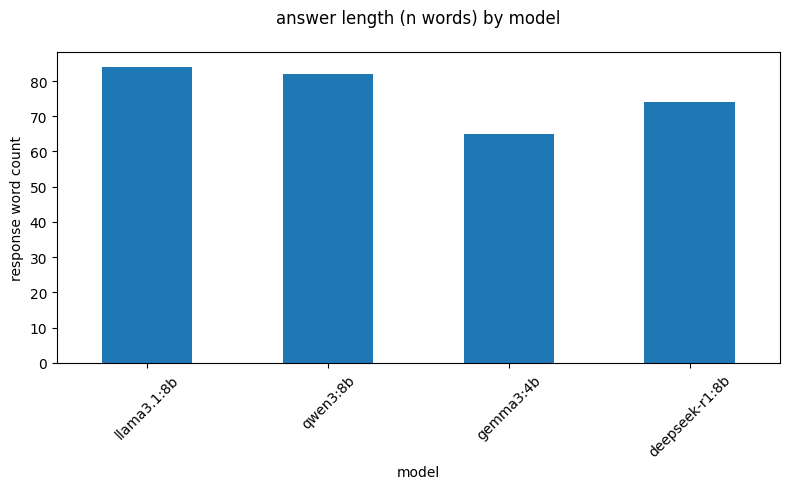

In [11]:
import matplotlib.pyplot as plt

# compute word counts for each model
word_counts = test_df.set_index('model')['response'].apply(lambda x: len(x.split()))

# plot
word_counts.plot(kind="bar", figsize=(8,5))
plt.ylabel("response word count")
plt.title("answer length (n words) by model\n")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<br>

Let's have a look at the main words used in each model's response.

> 🏃 **Run the cell below** to **process** the response data into a **word frequency table** so that we can build a word cloud.


In [13]:
import pandas as pd
import re
from collections import Counter

# Simple stopword list
stop_words = {
    "the", "and", "of", "e", "g", "vs", "to", "s", "a", "in", "is", "it", "that", "as",
    "for", "with", "on", "by", "this", "are", "or", "an", "be",
    "from", "at", "which", "but", "not", "have", "has", "their",
    "its", "also", "can", "how", "such", "frame", "framing", "frames"
}

top_n = 10
rows = []

for _, row in test_df.iterrows():
    model = row["model"]
    text = str(row["response"]).lower()

    # Extract words
    words = re.findall(r"\b[a-zA-Z]+\b", text)

    # Remove stopwords
    words = [w for w in words if w not in stop_words]

    # Count top words
    counts = Counter(words).most_common(top_n)

    for rank, (word, count) in enumerate(counts, start=1):
        rows.append({
            "model": model,
            "rank": rank,
            "word": word,
            "count": count,
            "word_count": f"{word} ({count})"   # convenient display column
        })

# Create dataframe
top_words_df = pd.DataFrame(rows)

# Pivot to horizontal format
wide_df = top_words_df.pivot(index='model', columns='rank', values='word_count')
wide_df.columns = [f"top_{col}" for col in wide_df.columns]
wide_df.reset_index(inplace=True)

wide_df

,model,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,top_10
0,deepseek-r1:8b,information (2),specific (2),communication (1),science (1),refers (1),strategic (1),selection (1),emphasis (1),certain (1),aspects (1)
1,gemma3:4b,about (2),you (2),say (2),communication (1),science (1),refers (1),information (1),presented (1),shape (1),perception (1)
2,llama3.1:8b,issue (2),example (2),communication (1),science (1),refers (1),way (1),information (1),presented (1),structured (1),influence (1)
3,qwen3:8b,information (2),specific (2),communication (1),science (1),refers (1),process (1),selecting (1),presenting (1),shape (1),audience (1)


> 🏃 **Run the cell below** to **plot** a word cloud for each model.

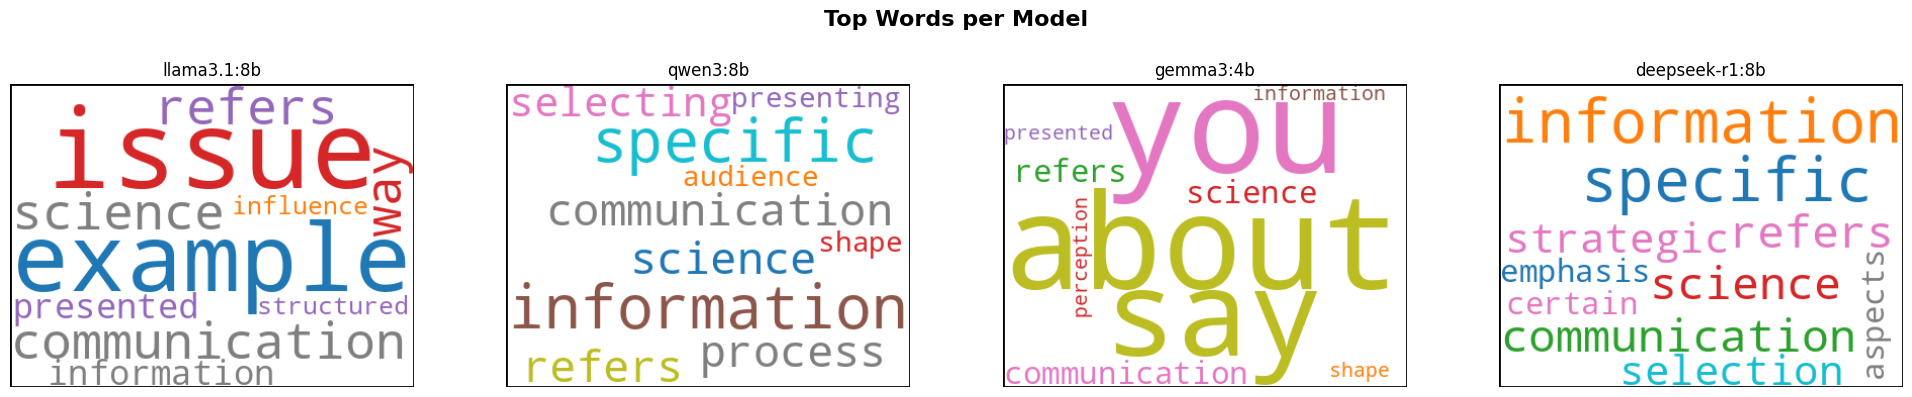

In [14]:
from wordcloud import WordCloud
from matplotlib.patches import Rectangle

# Iterate over each model and make a word cloud
models = top_words_df["model"].unique()
plt.figure(figsize=(5 * len(models), 4))

for i, model in enumerate(models, 1):
    # Build frequency dictionary: {word: count}
    top_words = (
        top_words_df[top_words_df["model"] == model]
        .set_index("word")["count"]
        .to_dict()
    )

    ax = plt.subplot(1, len(models), i)
    wc = WordCloud(
        width=400,
        height=300,
        background_color="white",
        colormap="tab10"
    ).generate_from_frequencies(top_words)

    ax.imshow(wc, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(model)

    # Add border rectangle
    rect = Rectangle(
        (0, 0), 1, 1, transform=ax.transAxes,
        fill=False, edgecolor="black", linewidth=2
    )
    ax.add_patch(rect)

plt.suptitle("Top Words per Model", fontsize=16, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


### **🧐 Questions**


> *  What did the models get **right**, and what did they get **wrong**?
> *  How did the response **differ** between the different models?
> *  Which model gave the 'best' response, and **why** do you think that?
> *  Is this kind of output **useful**?

<br>

---

# **📓 Part 3. Using LLMs for communication research**

While we can use LLMs for question-answering tasks, as we did before, they are particularly for the **'busy work'** of research.


Tasks such as data **cleaning**, **labelling**, **classification** and **extraction** are relatively straightforward to automate and **validate**. By automating such processes, we can work with much larger datasets and address research questions at a different scale than would typically be feasible using manual methods.


While these approaches enable new analytical **possibilities**, they also introduce **risks** that warrant careful consideration. We will keep this in mind as we work through the following examples.



<br>



### **☝ Example: Narrative framing: Hero/villain extraction**

In this demo, we're going to expand on the work done by [Frermann et al.
(2023)](https://doi.org/10.18653/v1/2023.acl-long.486), which looks at how
**narrative actors** - in this case, heroes, victims and villains - are allocated within climate
discourse.



### **3.1 Dataset selection**

Dataset selection is one of the most important parts of computational
communications tasks as it defines the scope of questions that can be answered
by your later analysis.

Today, we are using pre-built **Twitter Climate Change Sentiment** dataset from
[Kaggle](https://www.kaggle.com/datasets/edqian/twitter-climate-change-sentiment-dataset), for ease of access.

This dataset contains a sample of **tweets**, with their **sentiment** towards climate change
labeled as follows:


- **2 (News):** the tweet links to factual news about climate change  
- **1 (Pro):** the tweet **supports** the belief of anthropogenic climate change  
- **0 (Neutral):** the tweet **neither supports nor refutes** the belief of anthropogenic
  climate change  
- -**1 (Anti):** the tweet **refutes** the belief of anthropogenic climate change

<br>

> 🏃 **Run the cell below** to import the dataset and view the first five records.

In [40]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "twitter_sentiment_data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "edqian/twitter-climate-change-sentiment-dataset",
  file_path,
)

print("First 5 records:\n")
df.head()

/tmp/ipython-input-404345684.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'twitter-climate-change-sentiment-dataset' dataset.
First 5 records:



,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting hustle as it was global warming but the planet stopped warming for 15 yes while the suv boom,792927353886371840
1,1,"RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦",793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climate change is brilliant!!! Do watch. https://t.co/7rV6BrmxjW via @youtube,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing documentary by leonardodicaprio on climate change. We all think thisÃ¢â‚¬Â¦ https://t.co/kNSTE8K8im,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change &amp; natural disasters on the poÃ¢â‚¬Â¦",793125156185137153


Now we can see the first few records and how the sentiment is distribuited.

<br>

> 🏃 **Run the cell below** to view the distribution of labels.

Text(0, 0.5, 'tweet count')

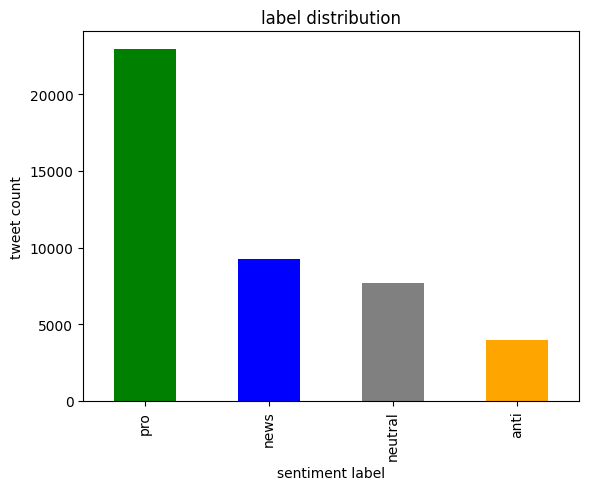

In [44]:
sentiment_map = {
    2: "news",
    1: "pro",
    0: "neutral",
    -1: "anti"
}

df["sentiment_text"] = df["sentiment"].map(sentiment_map)

df['sentiment_text'].value_counts().plot(title='label distribution', kind='bar', color=['green', 'blue', 'gray', 'orange'])

plt.xlabel("sentiment label")
plt.ylabel("tweet count")

### **3.2 Data preprocessing and cleaning**

We will be dropping URLs, retweet prefixes, and non-ASCII characters to reduce platform-specific noise and standardise the text for analysis. This will have the effect of removing entities who are being tweeted at, rather than mentioned, and hopefully make the data easier for the LLMs to process.

<br>

> 🏃 **Run the cell below** to clean the tweets and view the cleaned text in our dataframe.

In [42]:
# remove urls
df['clean_message'] = df['message'].str.replace(r'http\S+|www\S+', '', regex=True)

# remove handle after 'RT @'
df['clean_message'] = df['clean_message'].str.replace(r'^RT\s+@\w+:\s*', '', regex=True)

# remove hashes (but not the whole hashtag)
df['clean_message'] = df['clean_message'].str.replace('#', '', regex=True)

# remove &amp;
df['clean_message'] = df['clean_message'].str.replace('&amp;', 'and', regex=True)

# drop ascii characters
df['clean_message'] = df['clean_message'].str.encode('ascii', 'ignore').str.decode('ascii')

df[['message', 'clean_message']].head()

,message,clean_message
0,@tiniebeany climate change is an interesting hustle as it was global warming but the planet stopped warming for 15 yes while the suv boom,@tiniebeany climate change is an interesting hustle as it was global warming but the planet stopped warming for 15 yes while the suv boom
1,"RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦","Watch BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change htt"
2,Fabulous! Leonardo #DiCaprio's film on #climate change is brilliant!!! Do watch. https://t.co/7rV6BrmxjW via @youtube,Fabulous! Leonardo DiCaprio's film on climate change is brilliant!!! Do watch. via @youtube
3,RT @Mick_Fanning: Just watched this amazing documentary by leonardodicaprio on climate change. We all think thisÃ¢â‚¬Â¦ https://t.co/kNSTE8K8im,Just watched this amazing documentary by leonardodicaprio on climate change. We all think this
4,"RT @cnalive: Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change &amp; natural disasters on the poÃ¢â‚¬Â¦","Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change and natural disasters on the po"


LLMs can be computationally (and fiscally) expensive to run, so it is usually a good idea to **limit testing** and **prompt refinement** to a **small sample** of the data, before applying your refined prompt to the broader dataset.

<br>

> 🏃 **Run the cell below** select a random sample of tweets.


In [51]:
# for testing -  take a sample

df_samp = df.sample(n=5, random_state=66)
df_samp[['tweetid', 'clean_message', 'sentiment_text']].head(10)

,tweetid,clean_message,sentiment_text
31891,962746292249260032,"Donald Trump is hampering fight against climate change, WEF warns",news
8032,804337380073340928,Mass migration could become the new normal due to climate change warn senior military figures Via @d,news
21450,867815025796407296,It's 26 where I live how can any one say global warming is fake it's to fucking hot for the UK,pro
7344,800487683067813888,Amazing how with all his knowledge Ben Carson believes climate change is a hoax.,pro
41302,713466010326712321,"Support this man tonight Seattle at safecofield Washingon. Doors open at 4.Fill all 50,000 seats. FeelTheBern",pro


### **3.3 Building the infrustructure**

While we have the data and the models, we need the code to make them interact
with each other. So, before we start writing prompts, we need to have a look at
how we can make the LLM interact with the data in a clean and reproducible way.

The first thing to do is build a response format. Think of this as the form that
the LLM will fill out when we ask it to look at tweet. In our example, we are
asking the LLM to identify the **hero**, the **villain** and the **victim** in each tweet, so
our response format will look something like this:

<br>

> 🏃 **Run the cell below** to define our **response format**.

In [25]:
from pydantic import BaseModel
from typing import Optional

class ResponseFormat(BaseModel):
    hero: Optional[str] = None
    victim: Optional[str] = None
    villain: Optional[str] = None

The second thing we need is a new **function** that can use this response format and feed the data to the model.

<br>

> 🏃 **Run the cell below** to define our new function. Again, this will not 'do' anything just yet, but we will **call** it in a moment.

In [52]:
from tqdm import tqdm

def query_llm_prompting(df_samp, mymodel, response_format, prompt):
    # make a copy so the original df_samp is untouched
    df_result = df_samp.copy()

    # get the columns from the response format
    cols = response_format.__fields__.keys()
    for col in cols:
        df_result[col] = None

    # iterate through each row in the dataframe
    for idx, row in tqdm(df_result.iterrows(), total=len(df_result)):
        response = ollama.chat(
            model=mymodel,
            messages=[
                {'role': 'system', 'content': prompt},
                {'role': 'user', 'content': row['clean_message']}
            ],
            format=response_format.model_json_schema(),
        )

        # extract text from full response
        parsed_response = response_format.model_validate_json(response.message.content)

        for col in cols:
            df_result.at[idx, col] = getattr(parsed_response, col)


    return df_result

---
# **🔧 Part 4. Prompt engineering**



### **4.1 Model Selection**
In this section, we will work into groups and each run a pre-determined model, developing and refining our prompt as we go. We will then take a few minutes to discuss the differences in the outputs between each model.

<br>

> 🏃 **Run the cell below** to select your model.

In [28]:
model = 'llama3.1:8b'
print(f"Using model:\n\n {model}\n")

Using model:

 llama3.1:8b



### **4.2 Zero-shot prompting**

**Zero-shot prompting** is the form of LLM prompting that benefits only from the **knowledge contained within the LLM itself**. Instructions are provided, with no examples of the desired output.

<br>

> 🏃 **Run the cell below** to define your zero-shot prompt.

In [64]:
prompt_zeroshot = '''
You are a helpful research assistant, interested in the framing of narratives in tweets about climate change. You have been tasked with identifying the heroes, villains and victims in a selection of tweets.
Task: Read each tweet and decide if there is a hero, a villain or a victim, as per the following criteria:

Hero: an entity contributing to/responsible for issue resolution
Villain: an entity contributing to/responsible for issue cause
Victim: an entity suffering the consequences of an issue

Extract from the text the names of entities (people, groups, organisations) that are explicitly  or implicitly framed as either heroes, victims or villains. Do not make your own interpretations. If there is no hero, villain, or victim, respond with 'none'.
'''

<br>

> 🏃 **Run the cell below** to pass this **zero-shot prompt** to the model, and view the response.

In [65]:
response_format = ResponseFormat()
response_df_zeroshot = query_llm_prompting(df_samp, mymodel, response_format, prompt=prompt_zeroshot)

response_df_zeroshot[['clean_message', 'hero', 'villain', 'victim']]

/tmp/ipython-input-4254469634.py:8: PydanticDeprecatedSince20: The `__fields__` attribute is deprecated, use the `model_fields` class property instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  cols = response_format.__fields__.keys()
100%|██████████| 5/5 [03:14<00:00, 38.89s/it]


,clean_message,hero,villain,victim
31891,"Donald Trump is hampering fight against climate change, WEF warns",None,World Economic Forum (WEF),None
8032,Mass migration could become the new normal due to climate change warn senior military figures Via @d,Senior military figures,None,None
21450,It's 26 where I live how can any one say global warming is fake it's to fucking hot for the UK,None,none,None
7344,Amazing how with all his knowledge Ben Carson believes climate change is a hoax.,None,"Ben Carson (implicitly framed as villain for believing climate change is a hoax, which is the cause of the issue)",none
41302,"Support this man tonight Seattle at safecofield Washingon. Doors open at 4.Fill all 50,000 seats. FeelTheBern",None,none,None


### **4.3 Few-shot prompting**

**Few-shot prompting** is a prompting technique in which a small number of examples of the desired output are provided, to give the model an orrportunity to learn patterns and follow these in the output.


<br>

> 🏃 **Run the cell below** to define your zero-shot prompt. Notice that the examples provided give a clear image of the expected output.

In [66]:
prompt_fewshot = '''
You are a helpful research assistant, interested in the framing of narratives in tweets about climate change. You have been tasked with identifying the heroes, villains and victims in a selection of tweets.
Task: Read each tweet and decide if there is a hero, a villain or a victim, as per the following criteria:

Hero: an entity contributing to/responsible for issue resolution
Villain: an entity contributing to/responsible for issue cause
Victim: an entity suffering the consequences of an issue

Examples:
1. Theresa May's new chief of staff, Gavin Barwell, is known for his knowledgable concern about climate change
    hero: Gavin Barwell
    victim: None
    villain: None

2. The reality of climate change impacts everyone but the truth is that poor communities suffer most...perpetuating the injustice
    hero: None
    victim: poor communities
    villain: climate change

3. Anti-Trump actor fights global warming, but wont give up 14 homes and private jet
    hero: Anti-Trump actor
    victim: None
    villain: Anti-Trump actor

Extract from the text the names of entities (people, groups, organisations) that are explicitly or implicitly framed as either heroes, victims or villains. Do not make your own interpretations. If there is no hero, villain, or victim, respond with 'none'.
'''

<br>

> 🏃 **Run the cell below** to pass this **few-shot prompt** to the model, and view the response.

In [67]:
response_df_fewshot = query_llm_prompting(df_samp, mymodel, response_format, prompt=prompt_fewshot)

response_df_fewshot[['clean_message', 'hero', 'villain', 'victim']]

/tmp/ipython-input-4254469634.py:8: PydanticDeprecatedSince20: The `__fields__` attribute is deprecated, use the `model_fields` class property instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  cols = response_format.__fields__.keys()
100%|██████████| 5/5 [02:43<00:00, 32.74s/it]


,clean_message,hero,villain,victim
31891,"Donald Trump is hampering fight against climate change, WEF warns",WEF,Donald Trump,None
8032,Mass migration could become the new normal due to climate change warn senior military figures Via @d,none,none,None
21450,It's 26 where I live how can any one say global warming is fake it's to fucking hot for the UK,none,none,None
7344,Amazing how with all his knowledge Ben Carson believes climate change is a hoax.,none,none,None
41302,"Support this man tonight Seattle at safecofield Washingon. Doors open at 4.Fill all 50,000 seats. FeelTheBern",none,none,None


### **4.4 Chain-of-thought reasoning**

**Chain-of-thought reasoning** is a prompting technique that guides the LLM through the task step-by-step, providing a logical flow for the analysis, as well as examples. It is common also to have the LLM provide some sort of justification for its response, which is useful for interpretability.


In [68]:
prompt_cot = '''
You are a helpful research assistant, interested in the framing of narratives in tweets about climate change. You have been tasked with identifying the heroes, villains and victims in a selection of tweets.
Task:
Read each tweet and decide if there is a hero, a villain or a victim, as per the following criteria:

Hero: an entity contributing to/responsible for issue resolution
Villain: an entity contributing to/responsible for issue cause
Victim: an entity suffering the consequences of an issue

Examples:
1. Theresa May's new chief of staff, Gavin Barwell, is known for his knowledgable concern about climate change
    hero: Gavin Barwell
    victim: None
    villain: None

2. The reality of climate change impacts everyone but the truth is that poor communities suffer most...perpetuating the injustice
    hero: None
    victim: poor communities
    villain: climate change

3. Anti-Trump actor fights global warming, but wont give up 14 homes and private jet
    hero: Anti-Trump actor
    victim: None
    villain: Anti-Trump actor

Chain of thought:
1. Identify the central issue: Determine what climate-related problem or event the tweet is discussing.
2. Look for conflict or tension: Check if the tweet highlights a problem, blame, praise, or action.
3. Detect heroes: Identify entities praised for mitigating or solving the issue.
4. Detect victims: Identify entities suffering negative consequences of the issue.
5. Detect villains: Identify entities blamed for causing or worsening the issue.

Extract from the text the names of entities (people, groups, organisations) that are explicitly or implicitly framed as either heroes, victims or villains. Do not make your own interpretations. If there is no hero, villain, or victim, respond with 'none'.
'''

<br>

> 🏃 **Run the cell below** to pass this **chain-of-thought prompt** to the model, and view the response.

In [69]:
class CoT_ResponseFormat(BaseModel):
    hero: Optional[str] = None
    victim: Optional[str] = None
    villain: Optional[str] = None
    reasoning: Optional[str] = None

response_format = CoT_ResponseFormat()
response_df_cot = query_llm_prompting(df_samp, mymodel, response_format, prompt=prompt_cot)

response_df_cot[['clean_message', 'hero', 'villain', 'victim', 'reasoning']]

/tmp/ipython-input-4254469634.py:8: PydanticDeprecatedSince20: The `__fields__` attribute is deprecated, use the `model_fields` class property instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  cols = response_format.__fields__.keys()
100%|██████████| 5/5 [03:39<00:00, 43.94s/it]


,clean_message,hero,villain,victim,reasoning
31891,"Donald Trump is hampering fight against climate change, WEF warns",None,Donald Trump,None,"Donald Trump is explicitly framed as hampering the fight against climate change, fitting the villain criteria of contributing to/responsible for issue cause by obstructing resolution efforts."
8032,Mass migration could become the new normal due to climate change warn senior military figures Via @d,None,climate change,None,"The tweet identifies climate change as the cause of mass migration, which is a consequence, making it the villain according to the criteria. No entities are explicitly or implicitly framed as heroes or victims in the text."
21450,It's 26 where I live how can any one say global warming is fake it's to fucking hot for the UK,None,None,None,None
7344,Amazing how with all his knowledge Ben Carson believes climate change is a hoax.,None,Ben Carson,None,Ben Carson is framed as the villain because his belief that climate change is a hoax contributes to the issue by denying its existence and hindering potential resolutions.
41302,"Support this man tonight Seattle at safecofield Washingon. Doors open at 4.Fill all 50,000 seats. FeelTheBern",None,None,None,"The tweet does not explicitly mention climate change or frame any entities as heroes, villains, or victims. The phrase 'this man' is vague and not named, and 'FeelTheBern' is ambiguous without context."


In [73]:
response_df.columns

Index(['sentiment', 'message', 'tweetid', 'clean_message', 'sentiment_text',
       'hero', 'victim', 'villain', 'prompt_type', 'reasoning'],
      dtype='object')

In [72]:
# plot whether a hero, villain or victim was found in each df

# combine response_dfs with column for prompt_type
response_df_zeroshot['prompt_type'] = 'zeroshot'
response_df_fewshot['prompt_type'] = 'fewshot'
response_df_cot['prompt_type'] = 'cot'

# concat vertically
response_df = pd.concat([response_df_zeroshot, response_df_fewshot, response_df_cot])
response_df.sort_values(by='tweetid')

,sentiment,message,tweetid,clean_message,sentiment_text,hero,victim,villain,prompt_type,reasoning
41302,1,"RT @dawn_ley: Support this man tonight #Seattle at #safecofield #Washingon. Doors open at 4.Fill all 50,000 seats. #FeelTheBern https://t…",713466010326712321,"Support this man tonight Seattle at safecofield Washingon. Doors open at 4.Fill all 50,000 seats. FeelTheBern",pro,None,None,none,zeroshot,NaN
41302,1,"RT @dawn_ley: Support this man tonight #Seattle at #safecofield #Washingon. Doors open at 4.Fill all 50,000 seats. #FeelTheBern https://t…",713466010326712321,"Support this man tonight Seattle at safecofield Washingon. Doors open at 4.Fill all 50,000 seats. FeelTheBern",pro,none,None,none,fewshot,NaN
41302,1,"RT @dawn_ley: Support this man tonight #Seattle at #safecofield #Washingon. Doors open at 4.Fill all 50,000 seats. #FeelTheBern https://t…",713466010326712321,"Support this man tonight Seattle at safecofield Washingon. Doors open at 4.Fill all 50,000 seats. FeelTheBern",pro,None,None,None,cot,"The tweet does not explicitly mention climate change or frame any entities as heroes, villains, or victims. The phrase 'this man' is vague and not named, and 'FeelTheBern' is ambiguous without context."
7344,1,Amazing how with all his knowledge Ben Carson believes climate change is a hoax.,800487683067813888,Amazing how with all his knowledge Ben Carson believes climate change is a hoax.,pro,None,none,"Ben Carson (implicitly framed as villain for believing climate change is a hoax, which is the cause of the issue)",zeroshot,NaN
7344,1,Amazing how with all his knowledge Ben Carson believes climate change is a hoax.,800487683067813888,Amazing how with all his knowledge Ben Carson believes climate change is a hoax.,pro,none,None,none,fewshot,NaN
7344,1,Amazing how with all his knowledge Ben Carson believes climate change is a hoax.,800487683067813888,Amazing how with all his knowledge Ben Carson believes climate change is a hoax.,pro,None,None,Ben Carson,cot,Ben Carson is framed as the villain because his belief that climate change is a hoax contributes to the issue by denying its existence and hindering potential resolutions.
8032,2,RT @GRI_LSE: Mass migration could become the ‘new normal’ due to climate change warn senior military figures https://t.co/XKDqxxHP8t Via @d…,804337380073340928,Mass migration could become the new normal due to climate change warn senior military figures Via @d,news,none,None,none,fewshot,NaN
8032,2,RT @GRI_LSE: Mass migration could become the ‘new normal’ due to climate change warn senior military figures https://t.co/XKDqxxHP8t Via @d…,804337380073340928,Mass migration could become the new normal due to climate change warn senior military figures Via @d,news,Senior military figures,None,None,zeroshot,NaN
8032,2,RT @GRI_LSE: Mass migration could become the ‘new normal’ due to climate change warn senior military figures https://t.co/XKDqxxHP8t Via @d…,804337380073340928,Mass migration could become the new normal due to climate change warn senior military figures Via @d,news,None,None,climate change,cot,"The tweet identifies climate change as the cause of mass migration, which is a consequence, making it the villain according to the criteria. No entities are explicitly or implicitly framed as heroes or victims in the text."
21450,1,It's 26° where I live how can any one say global warming is fake it's to fucking hot for the UK,867815025796407296,It's 26 where I live how can any one say global warming is fake it's to fucking hot for the UK,pro,None,None,None,cot,None


/tmp/ipython-input-1347422832.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[outcomes] = df[outcomes].applymap(clean_empty)


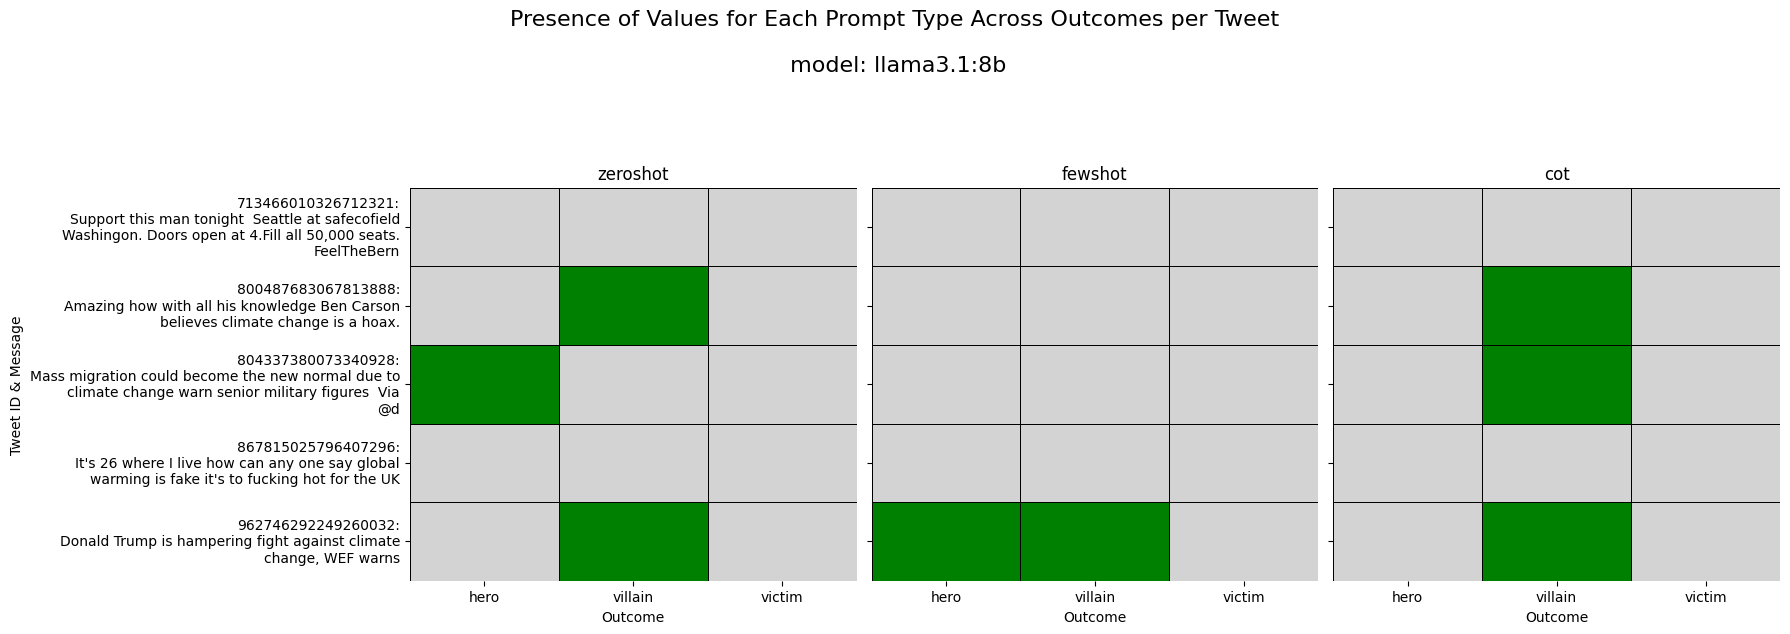

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import textwrap

# Copy and lowercase columns first
df = response_df.copy()
df.columns = [c.lower() for c in df.columns]

outcomes = ['hero', 'villain', 'victim']

def clean_empty(x):
    if pd.isna(x):
        return np.nan
    if isinstance(x, str) and x.strip().lower() in ['none', '']:
        return np.nan
    return x

df[outcomes] = df[outcomes].applymap(clean_empty)

df_long = df.melt(
    id_vars=['tweetid', 'prompt_type', 'clean_message'],
    value_vars=outcomes,
    var_name='outcome',
    value_name='value'
)

df_long['has_value'] = df_long['value'].notna()

prompt_types = df['prompt_type'].unique()

# Wrap messages to max width of 50 chars
def wrap_text(text, width=50):
    return "\n".join(textwrap.wrap(str(text), width))

df_long['tweet_label'] = df_long['tweetid'].astype(str) + ":\n" + df_long['clean_message'].apply(lambda x: wrap_text(x, 50))

fig, axes = plt.subplots(nrows=1, ncols=len(prompt_types),
                         figsize=(6 * len(prompt_types), len(df['tweetid'].unique()) * 1.2),
                         sharey=True)

for i, prompt in enumerate(prompt_types):
    df_prompt = df_long[df_long['prompt_type'] == prompt]

    # Pivot table: rows = tweet_label, columns = outcome
    df_pivot = df_prompt.pivot_table(
        index='tweet_label',
        columns='outcome',
        values='has_value',
        aggfunc='any',
        fill_value=False
    )

    # Reorder columns
    df_pivot = df_pivot[outcomes]

    # Plot heatmap
    sns.heatmap(df_pivot, ax=axes[i], cmap=['lightgrey', 'green'], cbar=False,
                linewidths=0.5, linecolor='black')
    axes[i].set_title(f"{prompt}")
    axes[i].set_xlabel("Outcome")
    if i == 0:
        axes[i].set_ylabel("Tweet ID & Message")
    else:
        axes[i].set_ylabel("")

# Move the suptitle higher
plt.suptitle(f"Presence of Values for Each Prompt Type Across Outcomes per Tweet\n\n model: {model}", fontsize=16, y=1.05)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### **4.5 Classifying our Roles**

In [ ]:
from typing import Literal

ActorType = Literal[
    "ENVIRONMENT",
    "CLIMATECHANGE",
    "ENVIROMENTAL_ACTIVISTS",
    "GENERAL_PUBLIC",
    "GOVERNMENTS_AND_POLITICIANS",
    "GREEN_TECHNOLOGY",
    "INDUSTRY",
    "EMISSIONS",
    "LEGISLATION_AND_POLICY",
    "MEDIA",
    "SCIENCE_AND_EXPERTS",
]
class ClassificationResponseFormat(BaseModel):
    hero: Optional[str] = None
    hero_type: Optional[ActorType] = None
    victim: Optional[str] = None
    victim_type: Optional[ActorType] = None
    villain: Optional[str] = None
    villain_type: Optional[ActorType] = None

In [ ]:
prompt_cot = '''
You are a helpful research assistant, interested in the framing of narratives in tweets about climate change. You have been tasked with identifying the heroes, villains and victims in a selection of tweets.
Task:
Read each tweet and decide if there is a hero, a villain or a victim, as per the following criteria:

Hero: an entity contributing to/responsible for issue resolution
Villain: an entity contributing to/responsible for issue cause
Victim: an entity suffering the consequences of an issue

Chain of thought:
1. Identify the central issue: Determine what climate-related problem or event the tweet is discussing.
2. Look for conflict or tension: Check if the tweet highlights a problem, blame, praise, or action.
3. Detect heroes: Identify entities praised for mitigating or solving the issue.
4. Detect victims: Identify entities suffering negative consequences of the issue.
5. Detect villains: Identify entities blamed for causing or worsening the issue.
6. Identify Roles: For any identified actors, assign them one of the available types to the best of your ability. Only assing roles if you have identified an actor. Any identified actor will have an allocated type

Actor Types:
    "ENVIRONMENT": The natural world including ecosystems, wildlife, and natural resources.
    "CLIMATE_CHANGE": Long-term changes in temperature, precipitation, and weather patterns caused by human activities.
    "ENVIRONMENTAL_ACTIVISTS": Individuals or groups advocating for environmental protection and sustainability.
    "GENERAL_PUBLIC": The broad populations, communities, or individuals affected by or involved in environmental issues.
    "GOVERNMENTS_AND_POLITICIANS": Authorities and elected officials responsible for creating and enforcing laws and policies.
    "GREEN_TECHNOLOGY": Innovations and technologies aimed at reducing environmental impact and promoting sustainability.
    "INDUSTRY": Businesses and sectors involved in production, manufacturing, and economic activities impacting the environment.
    "EMISSIONS": Release of pollutants or greenhouse gases into the atmosphere from various sources.
    "LEGISLATION_AND_POLICY": Laws, regulations, and guidelines designed to manage environmental and climate-related issues.
    "MEDIA": Channels and platforms that disseminate information and shape public opinion on environmental topics.
    "SCIENCE_AND_EXPERTS": Researchers and professionals providing knowledge, data, and analysis on environmental and climate matters.

Examples:
1. Theresa May's new chief of staff, Gavin Barwell, is known for his knowledgable concern about climate change
    hero: Gavin Barwell
    hero_type: "GOVERNMENTS_AND_POLITICIANS",

1. The reality of climate change impacts everyone but the truth is that poor communities suffer most...perpetuating the injustice
    victim: poor communities
    hero_type: "GENERAL_PUBLIC"
    villain: Climate Change
    villain_type: "CLIMATE_CHANGE"

1. Anti-Trump actor fights global warming, but wont give up 14 homes and private jet
    hero: Anti-Trump actor
    hero_type: "ENVIROMENTAL_ACTIVISTS"
    villain: Anti-Trump actor
    villain_type: "ENVIROMENTAL_ACTIVISTS"

Extract from the text the names of entities (people, groups, organisations) that are explicitly framed as either heroes, victims or villains. Do not make your own interpretations. If there is no hero, villain, or victim, respond with 'none'.
'''

In [ ]:
response_format = ClassificationResponseFormat()
response_df = transform_data(df_samp, model, response_format, prompt=prompt_cot)

print(response_df[['clean_message', 'hero', 'villain', 'victim', 'hero_type', 'villain_type', 'victim_type']])

---
# **🔎 Part 5. Comparing results**

In groups, let's see how the responses differed

- If you had the same models, did they respond the same?
- If there were different models, did you see any changes between your responses?
- If you changed the prompts, how did this change the responses?






---
# **📏 Part 6. Quantitative Analysis**
"Here is one we prepared earlier"
* assume we are happy with our prompt
* shows the impact of different prompting strategies on different models on much larger dataset (impractical to do in the workshop)

In [ ]:
import pandas as pd

qwen_prebaked  = pd.read_pickle('https://github.com/Fonzzy1/LLM-Workshop/raw/refs/heads/main/qwen3:8b.pkl')
deepseek_prebaked = pd.read_pickle('https://github.com/Fonzzy1/LLM-Workshop/raw/refs/heads/main/deepseek-r1:8b.pkl')
gemma_prebaked = pd.read_pickle("https://github.com/Fonzzy1/LLM-Workshop/raw/refs/heads/main/gemma3:4b.pkl")
lamma_prebaked = pd.read_pickle("https://github.com/Fonzzy1/LLM-Workshop/raw/refs/heads/main/llama3.1:8b.pkl")

gemma_prebaked.head()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add model labels
qwen_prebaked["model"] = "Qwen3-8B"
deepseek_prebaked["model"] = "DeepSeek-R1-8B"
gemma_prebaked["model"] = "Gemma3-4B"
lamma_prebaked["model"] = "LLaMA3.1-8B"

# Combine
df = pd.concat(
    [qwen_prebaked, deepseek_prebaked, gemma_prebaked, lamma_prebaked],
    ignore_index=True
)

# --- 3. Melt to long format ---
long_df = df.melt(
    id_vars=["tweetid", "model",'sentiment','clean_message'],  # ensure tweetid is included
    value_vars=["hero_type", "villain_type", "victim_type"],
    var_name="role",
    value_name="type"
)

import seaborn as sns
import matplotlib.pyplot as plt

# Set theme
sns.set_theme(style="whitegrid")

# Create catplot
g = sns.catplot(
    data=long_df,
    x="type",
    hue="role",          # color by role now
    col="model",         # one plot per model
    kind="count",
    height=5,
    aspect=1.2,
    sharey=False,
    palette="Set2",
    col_wrap=2           # 2x2 grid
)

# Titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("", "Count")

# Rotate x-axis labels for readability
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()






In [ ]:
# Compute majority vote per tweet_id and role
# Treat None/NaN as valid
long_df["type"] = long_df["type"].where(long_df["type"].notna(), None)

# --- 4. Compute majority vote excluding None ---
def majority_vote(x):
    counts = x.value_counts(dropna=True)
    if len(counts):  # count None as a valid option
       return counts.idxmax()
    else:
      return None

majority_votes = (
    long_df.groupby(["tweetid", "role",'sentiment','clean_message'])["type"]
    .agg(majority_vote)
    .reset_index()
    .rename(columns={"type": "majority_type"})
).dropna()


# --- 5. Plot counts based on majority votes ---
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(
    data=majority_votes,
    x="majority_type",
    hue="role",
    palette="Set2"
)

plt.xlabel("")
plt.ylabel("Count (per tweet, majority vote)")
plt.xticks(rotation=90)
plt.title("Majority Vote Counts per Type Across Roles")
plt.legend(title="Role")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Majority votes already computed ---
# majority_votes has columns: tweetid, role, sentiment, clean_message, majority_type

sns.set_theme(style="whitegrid")

# Use catplot to create one plot per sentiment
g = sns.catplot(
    data=majority_votes,
    x="majority_type",
    hue="role",
    col="sentiment",           # one plot per sentiment
    kind="count",
    col_wrap=2,                # 2x2 grid for 4 sentiments
    height=5,
    aspect=1.2,
    palette="Set2",
    sharey=False
)

# Titles and axis labels
g.set_titles("Sentiment = {col_name}")
g.set_axis_labels("", "Count")
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=90)  # rotate x labels for readability

plt.tight_layout()
plt.show()

